This notebooko demonstrates the calculation of the mean free path and optical depth with and without Lorentz invariance violation from a given EBL photon density

In [1]:
%matplotlib inline

# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ebltable.ebl_from_model import EBL
from ebltable.tau_from_model import OptDepth
import astropy.units as u

# Initiate the class

In [3]:
ebl =  EBL.readmodel('gilmore')
tau = OptDepth.readmodel('gilmore')

Define some redshifts and energies for the interpolation:

In [4]:
z0 = 0.031
steps_z = 50
ETeV = np.logspace(-2,2,50)

## Calculate and plot mean free path

In [5]:
gam = ebl.mean_free_path(z0, ETeV)

Text(0, 0.5, 'Mean free path (Mpc)')

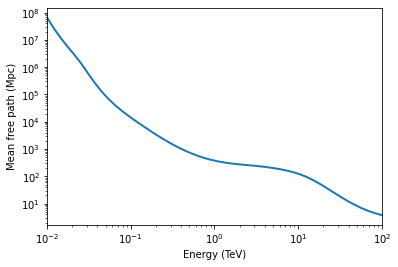

In [6]:
plt.loglog(ETeV,gam, lw = 2)
plt.gca().set_xlim(1e-2,1e2)
plt.gca().set_xlabel('Energy (TeV)')
plt.gca().set_ylabel('Mean free path (Mpc)')

## Calculate and plot optical depth w/ and w/o LIV

In [7]:
from time import time  as t

In [8]:
t0 = t()
# with LIV
tauLIV = ebl.optical_depth(z0,ETeV, LIV_scale=1e-7, nLIV=2)
#w/o LIV
tauCalc = ebl.optical_depth(z0,ETeV, LIV_scale=0.)
t1 = t()
print('it took ', t1 - t0, 's')

it took  0.4837489128112793 s


### Do the plot

Text(0.5, 0, 'Attenuation')

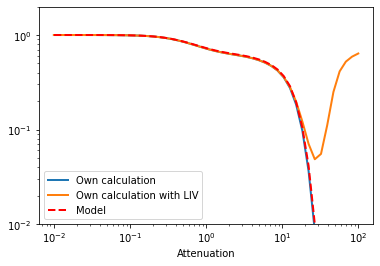

In [9]:
plt.loglog(ETeV,np.exp(-1. * tauCalc), lw = 2, label = 'Own calculation')
plt.loglog(ETeV,np.exp(-1. * tauLIV), lw = 2, label = 'Own calculation with LIV')
plt.loglog(ETeV,np.exp(-1. * tau.opt_depth(z0,ETeV)), lw = 2, ls = '--', 
           color = 'red', label = 'Model')

plt.legend(loc = 0)
plt.gca().set_ylim(1e-2,2)
plt.gca().set_xlabel('Energy (TeV)')
plt.gca().set_xlabel('Attenuation')